In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,train_test_split, KFold, cross_val_predict
from sklearn.metrics import mean_squared_error,r2_score,roc_curve,auc,precision_recall_curve, accuracy_score, \
recall_score, precision_score, confusion_matrix
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, ParameterGrid, StratifiedKFold
from sklearn.ensemble import BaggingRegressor,BaggingClassifier,AdaBoostRegressor,AdaBoostClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
import itertools as it
import time as time
import warnings
warnings.filterwarnings('ignore')

In [17]:
X = pd.read_csv("X_train.csv")
y = pd.read_csv("y_train.csv")

X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv")

In [18]:
X = X.drop(X.columns[0], axis=1)
y = y.drop(y.columns[0], axis=1)

X_test = X_test.drop(X_test.columns[0], axis=1)
y_test = y_test.drop(y_test.columns[0], axis=1)

>50 0.779 (0.009)
>100 0.777 (0.011)
>150 0.778 (0.010)
>200 0.776 (0.012)
>250 0.778 (0.011)
>300 0.778 (0.010)
>350 0.777 (0.009)
>400 0.777 (0.009)
>450 0.777 (0.009)
>500 0.777 (0.009)


Text(0.5, 0, 'Number of trees')

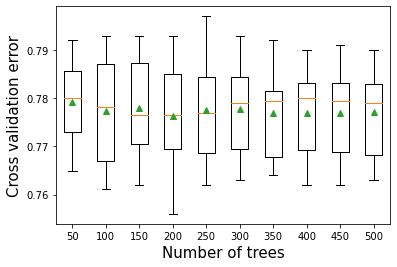

In [21]:
def get_models():
    models = dict()
    # define number of trees to consider
    n_trees = list(range(50, 501, 50))
    for n in n_trees:
        models[str(n)] = AdaBoostClassifier(n_estimators=n,random_state=1)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.ylabel('Cross validation error',fontsize=15)
plt.xlabel('Number of trees',fontsize=15)

>1 0.779 (0.009)
>2 0.775 (0.013)
>3 0.767 (0.011)
>4 0.760 (0.013)
>5 0.744 (0.014)
>6 0.737 (0.016)
>7 0.726 (0.011)
>8 0.718 (0.010)
>9 0.728 (0.015)
>10 0.726 (0.010)
>11 0.724 (0.012)
>12 0.730 (0.009)
>13 0.734 (0.012)
>14 0.736 (0.012)
>15 0.730 (0.011)
>16 0.731 (0.011)
>17 0.734 (0.010)
>18 0.735 (0.007)
>19 0.731 (0.007)
>20 0.732 (0.015)


Text(0.5, 0, 'Depth of each tree')

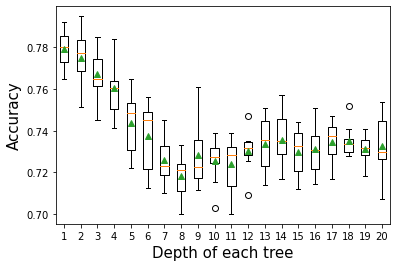

In [22]:
# get a list of models to evaluate
def get_models():
    models = dict()
    # explore depths from 1 to 10
    for i in range(1,21):
        # define base model
        base = DecisionTreeClassifier(max_depth=i)
        # define ensemble model
        models[str(i)] = AdaBoostClassifier(base_estimator=base)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
plt.boxplot(results, labels=names, showmeans=True)
plt.ylabel('Accuracy',fontsize=15)
plt.xlabel('Depth of each tree',fontsize=15)

>0.1 0.767 (0.013)
>0.2 0.773 (0.015)
>0.3 0.775 (0.018)
>0.4 0.775 (0.018)
>0.5 0.776 (0.016)
>0.6 0.777 (0.015)
>0.7 0.777 (0.014)
>0.8 0.779 (0.016)
>0.9 0.778 (0.017)
>1.0 0.775 (0.015)
>1.1 0.775 (0.016)
>1.2 0.775 (0.015)
>1.3 0.774 (0.016)
>1.4 0.777 (0.016)
>1.5 0.777 (0.015)
>1.6 0.776 (0.015)
>1.7 0.775 (0.015)
>1.8 0.771 (0.009)
>1.9 0.769 (0.015)
>2.0 0.240 (0.014)


Text(0.5, 0, 'Learning rate')

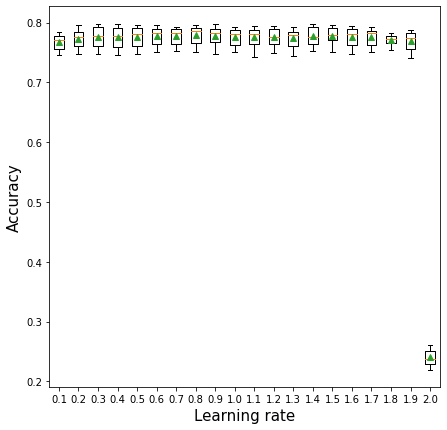

In [23]:
def get_models():
    models = dict()
    # explore learning rates from 0.1 to 2 in 0.1 increments
    for i in np.arange(0.1, 2.1, 0.1):
        key = '%.1f' % i
        models[key] = AdaBoostClassifier(learning_rate=i)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = KFold(n_splits=10, shuffle=True, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.figure(figsize=(7, 7))
plt.boxplot(results, labels=names, showmeans=True)
plt.ylabel('Accuracy',fontsize=15)
plt.xlabel('Learning rate',fontsize=15)

In [24]:
model = AdaBoostClassifier(random_state=1)
grid = dict()
grid['n_estimators'] = [10, 50, 100,200,500]
grid['learning_rate'] = [0.0001, 0.001, 0.01,0.1, 1.0]
grid['base_estimator'] = [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2), 
                          DecisionTreeClassifier(max_depth=3),DecisionTreeClassifier(max_depth=4)]
# define the evaluation procedure
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, 
                          verbose = True)
# execute the grid search
grid_result = grid_search.fit(X, y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
#    print("%f (%f) with: %r" % (mean, stdev, param)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best: 0.780843 using {'base_estimator': DecisionTreeClassifier(max_depth=2), 'learning_rate': 0.1, 'n_estimators': 500}


In [27]:
model = AdaBoostClassifier(random_state=1)
grid = dict()
grid['n_estimators'] = list(range(400,601,50))
grid['learning_rate'] = [0.08, 0.09, 0.1, 0.11, 0.12]
grid['base_estimator'] = [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2), 
                          DecisionTreeClassifier(max_depth=3),DecisionTreeClassifier(max_depth=4)]

# define the evaluation procedure
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, 
                          verbose = True)
# execute the grid search
grid_result = grid_search.fit(X, y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
#    print("%f (%f) with: %r" % (mean, stdev, param)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best: 0.780943 using {'base_estimator': DecisionTreeClassifier(max_depth=2), 'learning_rate': 0.1, 'n_estimators': 600}


In [29]:
model = AdaBoostClassifier(random_state=1)
grid = dict()
grid['n_estimators'] = list(range(800,1001,50))
grid['learning_rate'] = [0.08, 0.09, 0.1, 0.11, 0.12]
grid['base_estimator'] = [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2), 
                          DecisionTreeClassifier(max_depth=3),DecisionTreeClassifier(max_depth=4)]

# define the evaluation procedure
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, 
                          verbose = True)
# execute the grid search
grid_result = grid_search.fit(X, y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
#    print("%f (%f) with: %r" % (mean, stdev, param)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best: 0.781144 using {'base_estimator': DecisionTreeClassifier(max_depth=2), 'learning_rate': 0.08, 'n_estimators': 900}


In [37]:
y_1d = np.ravel(y)


(10002,)

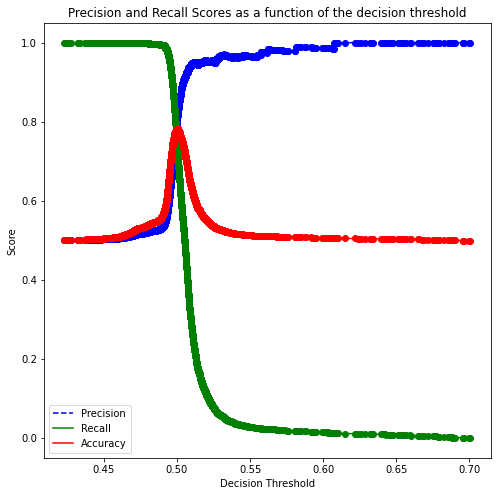

In [49]:
#Model based on the optimal parameters
model = AdaBoostClassifier(random_state=1,base_estimator = DecisionTreeClassifier(max_depth=2),learning_rate=0.08,
                          n_estimators=900).fit(X,y_1d)

# Note that we are using the cross-validated predicted probabilities, instead of directly using the 
# predicted probabilities on train data, as the model may be overfitting on the train data, and 
# may lead to misleading results
cross_val_ypred = cross_val_predict(AdaBoostClassifier(random_state=1,base_estimator = DecisionTreeClassifier(max_depth=2),learning_rate=0.08,
                          n_estimators=900), X, y_1d, cv = 5, method = 'predict_proba')

p, r, thresholds = precision_recall_curve(y, cross_val_ypred[:,1])
acc = np.ndarray(shape = (len(thresholds),))
i = 0
for th in thresholds:
    y_pred = cross_val_ypred[:,1] > th
    y_pred = y_pred.astype(int)
    acc[i] = accuracy_score(y_pred, y)
    i = i + 1
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision, Recall, Accuracy Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.plot(thresholds, acc, "r-", label="Accuracy")
    plt.plot(thresholds, precisions[:-1], "o", color = 'blue')
    plt.plot(thresholds, recalls[:-1], "o", color = 'green')
    plt.plot(thresholds, acc, "o", color = 'red')
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
    plt.legend()
plot_precision_recall_vs_threshold(p, r, thresholds)

In [51]:
index = np.argmax(acc)
print(index)

5058


In [61]:
thres = thresholds[index]
print(f"threshold: {thresholds[index]}")
print(f"Train accuracy: {acc[index] * 100}")
print(f"Train recall: {r[index] * 100}")
print(f"Train precision: {p[index] * 100}")

threshold: 0.5002138658802937
Train accuracy: 78.14437112577485
Train recall: 72.84345047923323
Train precision: 81.5195530726257


Accuracy:  77.40656851642129
ROC-AUC:  0.8617810784464625
Precision:  0.807741935483871
Recall:  0.7146118721461188


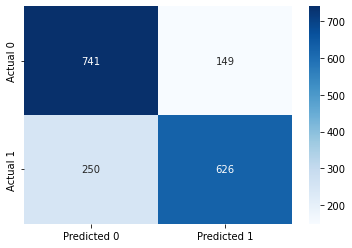

In [57]:
# Performance metrics computation for the optimum decision threshold probability
desired_threshold = thres

y_pred_prob = model.predict_proba(X_test)[:,1] 

# Classifying observations in the positive class (y = 1) if the predicted probability is greater
# than the desired decision threshold probability
y_pred = y_pred_prob > desired_threshold
y_pred = y_pred.astype(int)

#Computing the accuracy
print("Accuracy: ",accuracy_score(y_pred, y_test)*100)  

#Computing the ROC-AUC
fpr, tpr, auc_thresholds = roc_curve(y_test, y_pred_prob)
print("ROC-AUC: ",auc(fpr, tpr))# AUC of ROC

#Computing the precision and recall
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))

#Confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g');